In [233]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/Anvi/downloads/28D.csv')
df.columns
df.dtypes

Helper Column            object
year                      int64
week                      int64
date                     object
Need States              object
Total Sales             float64
Total Trade Spend       float64
DC Amount               float64
Store Amount on Hand    float64
Ecomm POS               float64
Factory POS             float64
dtype: object

In [234]:
names = df[df['Ecomm POS'].isnull()| df['Factory POS'].isnull()] #df['Total Sales'].isnull() | df['Total Trade Spend'].isnull()| df['DC Amount'].isnull()| df['Store Amount on Hand'].isnull()
names.head()
dfd = df.drop(names.index.tolist())

Need State 1


<Axes: xlabel='week', ylabel='Factory POS'>

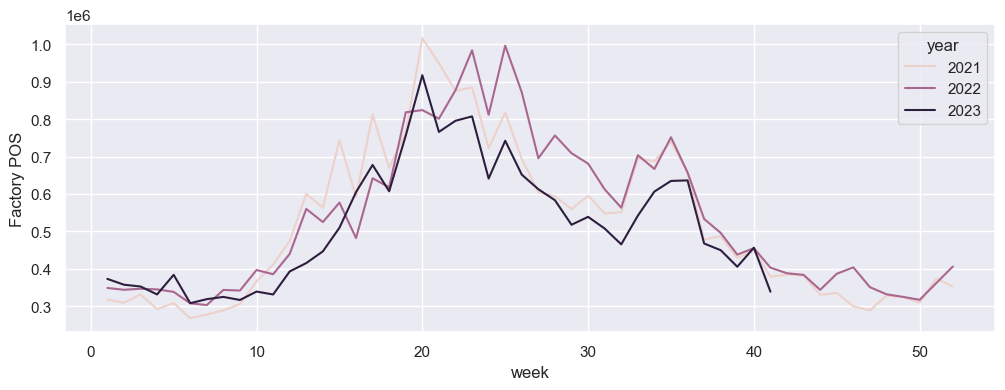

In [164]:
df1 = dfd[(dfd['Need States']=='Need State 1')]
print("Need State 1")
sns.lineplot(df1, x="week", y="Factory POS", hue='year', estimator=None)

year                2021        2022        2023
January-03     132818.25   225132.00   230725.50
January-10     395708.25   720135.00   402216.75
January-17     207779.25   227398.50   227010.00
January-24     323169.75   295862.25   660403.50
January-31      71536.50   473947.50   216312.75
February-07    980441.25   615947.25   470031.75
February-14    316326.00   405015.00   970320.75
February-21    480405.00   273339.00   675896.25
February-28   1341342.75  1633242.00   490109.25
March-06      2721590.25  1767609.00   491008.50
March-13       808580.25   401660.25   308736.00
March-20       462552.00   923920.50  1049037.75
March-27      1345166.25  1434591.75   645898.50
April-03      1344056.25  1005565.50  1002380.25
April-10       780374.25   197555.25  1767828.75
April-17       416756.25   745246.50   176432.25
April-24       783196.50   746291.25   269017.50
May-01         964353.75  1124841.00   206453.25
May-08         644009.25   825480.00   390882.75
May-15         21088

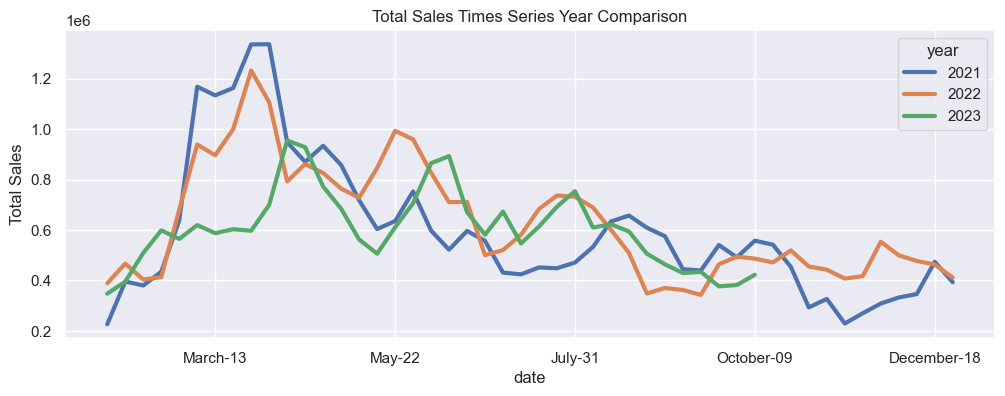

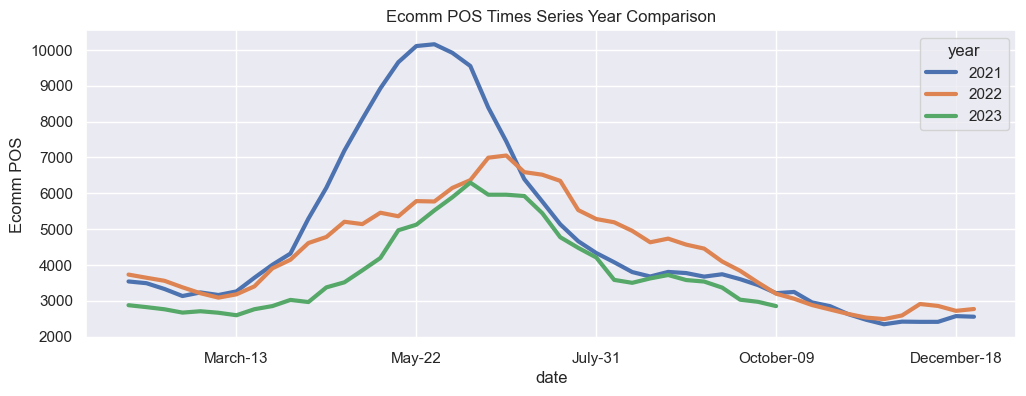

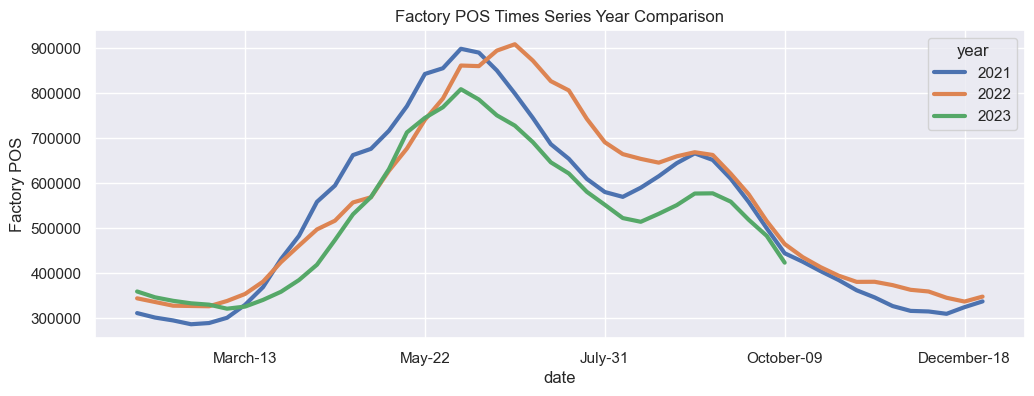

In [218]:
import numpy as np
from datetime import datetime as dt

def plotYearLines(field: str, rolling: int = 3, df: pd.DataFrame = df1):
    week_day = 1
    pivot_data = df.pivot(index='week', columns="year", values=field)
    pivot_data.index = [dt.strptime(f"2000-W{i}-{week_day}", "%G-W%V-%w").strftime('%B-%d') for i in pivot_data.index]
    print(pivot_data)
    pivot_data.rolling(rolling).mean().plot.line(lw=3)
    plt.title(f'{field} Times Series Year Comparison')
    plt.xlabel('date')
    plt.ylabel(f'{field}')

print(df)

plotYearLines('Total Sales', rolling=5)
plotYearLines('Ecomm POS', rolling=5, df=df1)
plotYearLines('Factory POS', rolling=5, df=df1)

year               2021       2022       2023
January-03    251858.25  239328.75  355815.00
January-10    510633.75  299952.00  304145.25
January-17    525278.25  367634.25  332245.50
January-24    480166.50  250038.00  718207.50
January-31    304409.25  253847.25  282531.75
February-07   460572.00  243423.75  447660.75
February-14   283466.25  328047.00  524059.50
February-21   419211.00  188490.75  273267.75
February-28   321424.50  361269.75  261685.50
March-06      285894.00  414115.50  592058.25
March-13      389976.00  324297.00  129294.00
March-20      357771.00  453584.25  621302.25
March-27      275889.75  378236.25  514803.00
April-03      354687.00  260363.25  257869.50
April-10      328035.75  323847.75  517135.50
April-17      259767.75  354027.75  394596.00
April-24      290293.50  422487.00  289171.50
May-01        319240.50  383335.50  416315.25
May-08        261920.25  557058.00  464193.00
May-15        271785.00  364514.25  375784.50
May-22        516226.50  475058.25

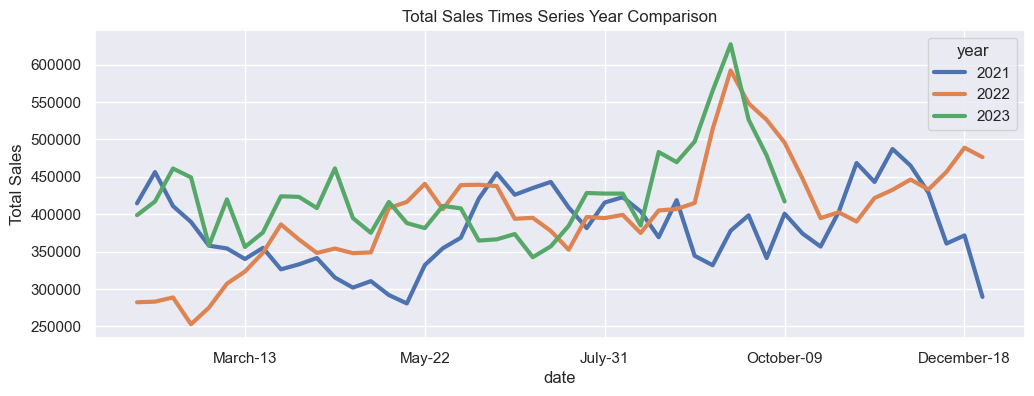

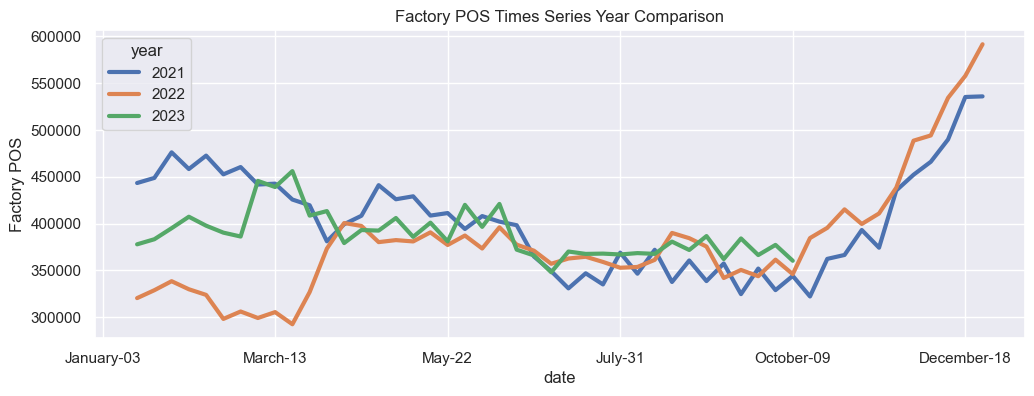

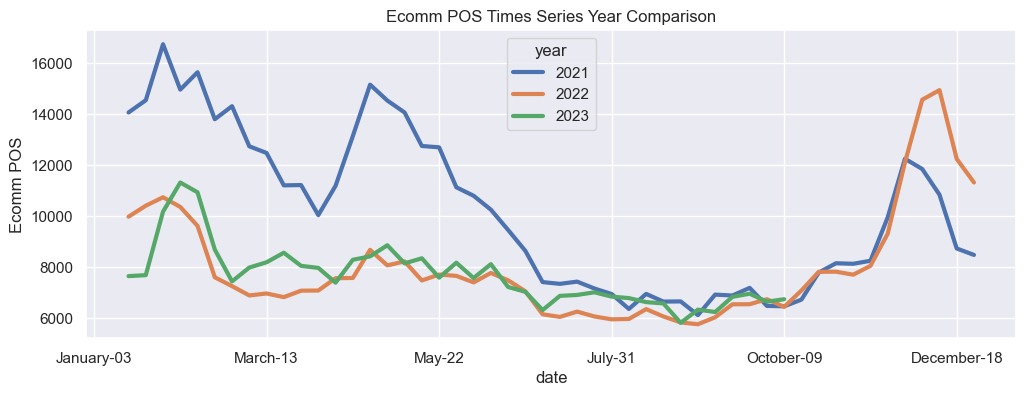

In [194]:
df2 = dfd[(dfd['Need States']=='Need State 2')]
#sns.lineplot(df2, x="week", y="Total Sales", hue='year', estimator=None)
plotYearLines('Total Sales', rolling=5, df=df2)
plotYearLines('Factory POS', rolling=3, df=df2)
plotYearLines('Ecomm POS', rolling=3, df=df2)

year               2021       2022       2023
January-03    209473.50  146636.25  323960.25
January-10    683112.00  398277.00  309346.50
January-17    627825.75  406825.50  340034.25
January-24    318566.25  297513.00  435669.00
January-31    439665.00  424525.50  320430.75
February-07   445863.75  524013.75  511701.00
February-14   334146.75  393878.25  313763.25
February-21   332299.50  168665.25  193104.75
February-28   345800.25  269997.75  145835.25
March-06      399765.00  213970.50  138671.25
March-13      251854.50  317165.25  163649.25
March-20      462864.75  465645.75  218181.75
March-27      264009.75  479124.00  385325.25
April-03      588178.50  256968.00  194237.25
April-10      463776.75  228345.00  359034.00
April-17      327388.50  289380.75  336595.50
April-24      212003.25  589102.50  483687.00
May-01        289918.50  461808.00  472200.00
May-08        229689.00  448005.00  327549.75
May-15        175822.50  218375.25  217059.75
May-22        468210.75  405483.00

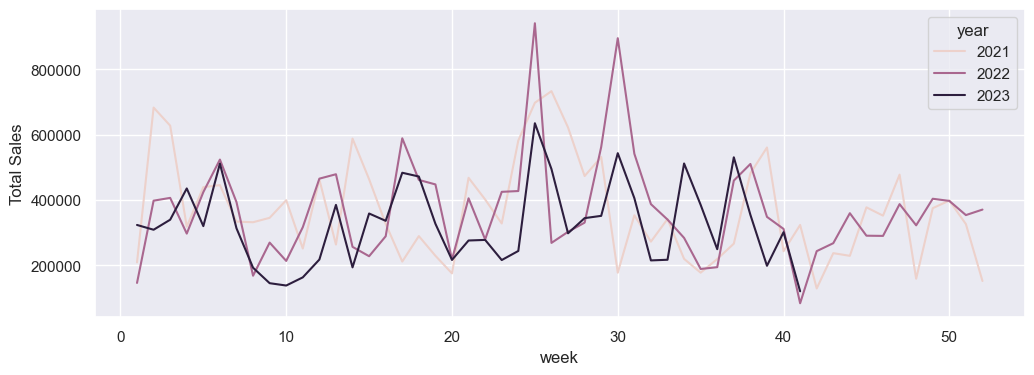

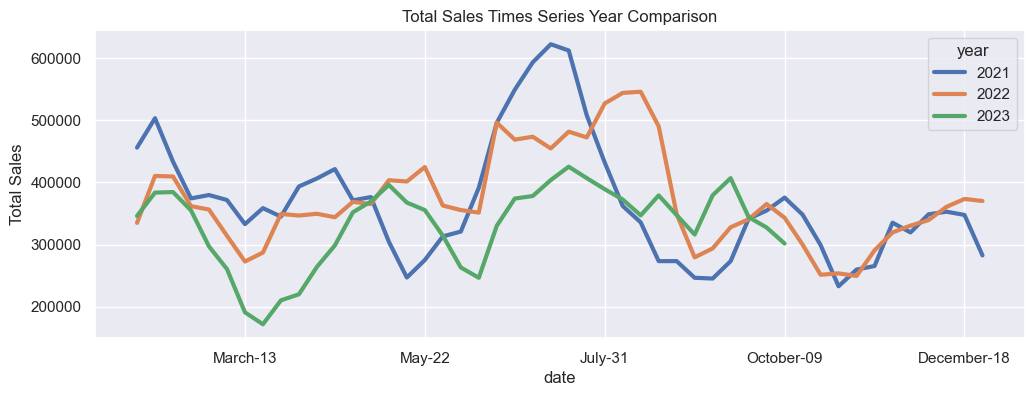

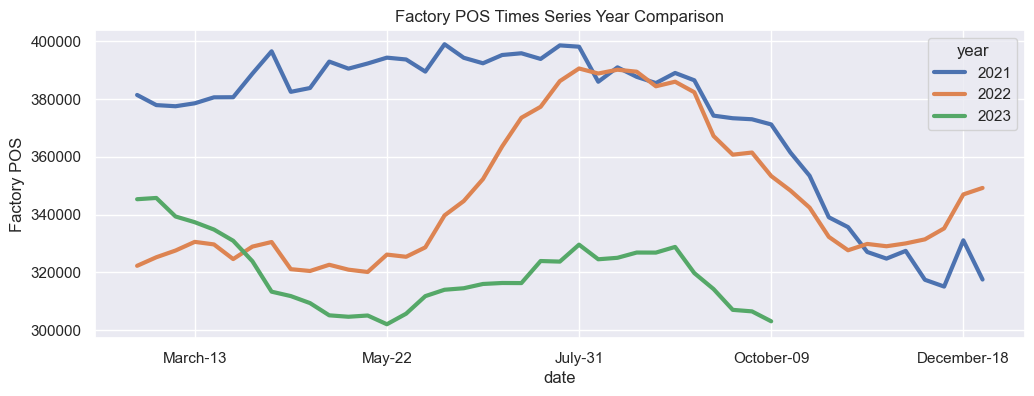

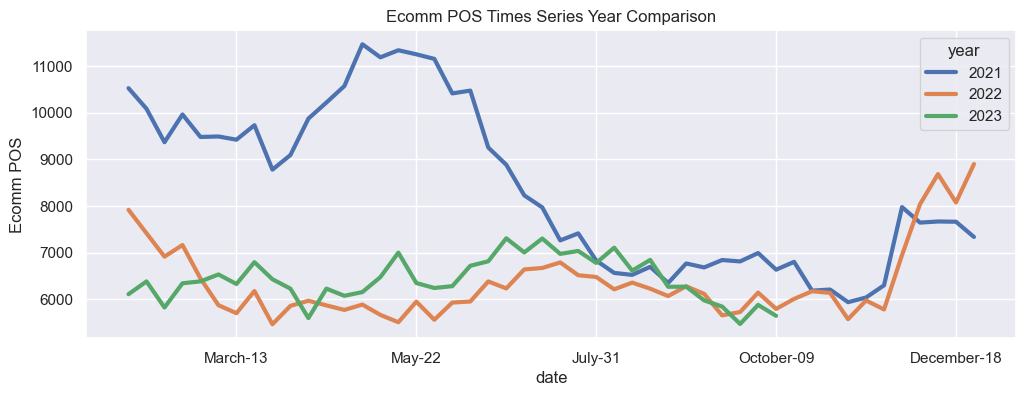

In [193]:
df3 = dfd[(dfd['Need States']=='Need State 3')]
sns.lineplot(df3, x="week", y="Total Sales", hue='year', estimator=None)
plotYearLines('Total Sales', rolling=5, df=df3)
plotYearLines('Factory POS', rolling=8, df=df3)
plotYearLines('Ecomm POS', rolling=5, df=df3)

year               2021       2022       2023
January-03    373678.50  231120.75  317171.25
January-10    597628.50  638800.50  275616.00
January-17    300238.50  573999.00  759098.25
January-24    319001.25  300548.25  354993.00
January-31    433508.25  455489.25  405148.50
February-07   640492.50  436341.00  499875.00
February-14   448128.00  448062.75  417354.75
February-21   412890.00  193704.00  266517.75
February-28   331031.25  408852.75  347949.75
March-06      461514.75  477458.25  399438.00
March-13      388106.25  236302.50  335752.50
March-20      476425.50  419783.25  453015.75
March-27      488613.75  377538.75  466305.00
April-03      475796.25  213425.25  285252.75
April-10      357441.75  290613.75  421256.25
April-17      518808.00  286107.75  367767.75
April-24      343884.00  458959.50  368679.75
May-01        460024.50  440440.50  413159.25
May-08        368431.50  570684.00  458248.50
May-15        186488.25  354081.00  291272.25
May-22        295438.50  330423.75

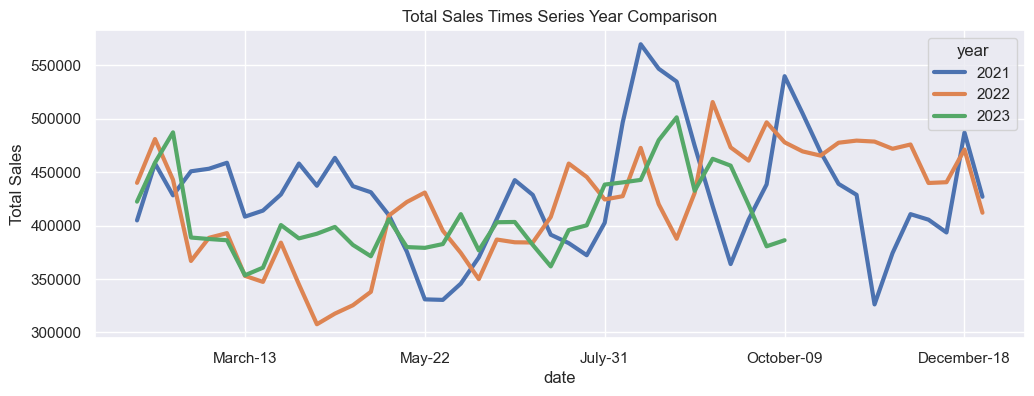

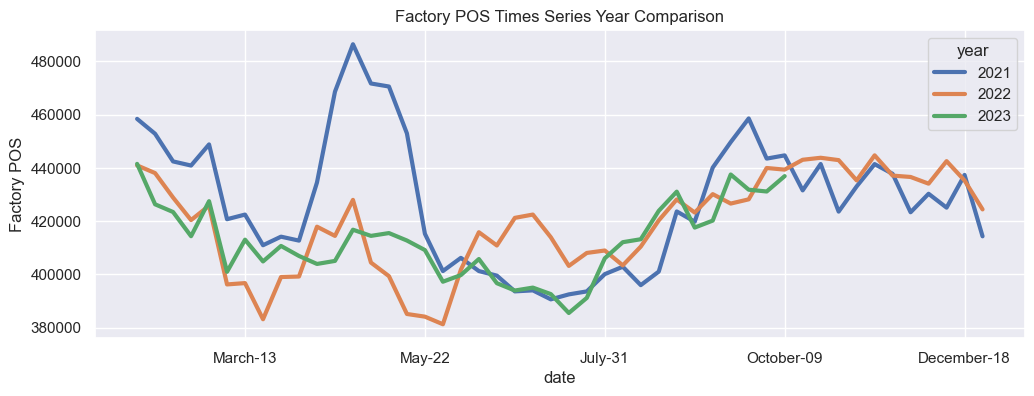

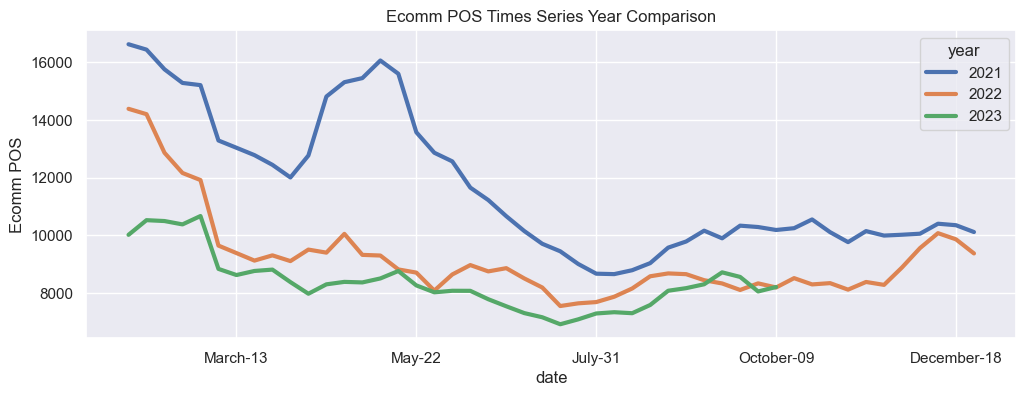

In [197]:
df4 = dfd[(dfd['Need States']=='Need State 4')]
plotYearLines('Total Sales', rolling=5, df=df4)
plotYearLines('Factory POS', rolling=5, df=df4)
plotYearLines('Ecomm POS', rolling=5, df=df4)

year               2021       2022       2023
January-03     15795.00   28734.75   89032.50
January-10     11154.75   20072.25   62028.00
January-17     10549.50   19849.50   64474.50
January-24     10443.00   23655.75   66874.50
January-31     12430.50   22807.50   66686.25
February-07    12349.50   29843.25   78102.75
February-14    19611.75   55258.50  141602.25
February-21    14553.75   32664.00   66030.75
February-28    18550.50   37790.25   72634.50
March-06       40655.25   71468.25  124755.75
March-13       37981.50   43072.50   75292.50
March-20       71428.50   53145.00   85533.00
March-27      100258.50   88083.75  137568.00
April-03      134664.75   67195.50  103520.25
April-10      357144.75  132243.00  314976.75
April-17      191838.00   91773.00  271800.00
April-24      237999.75  226299.00  322632.00
May-01        139817.25  167946.75  274773.00
May-08        312561.00  470982.75  473654.25
May-15        518168.25  372768.75  501765.00
May-22        513900.75  344436.00

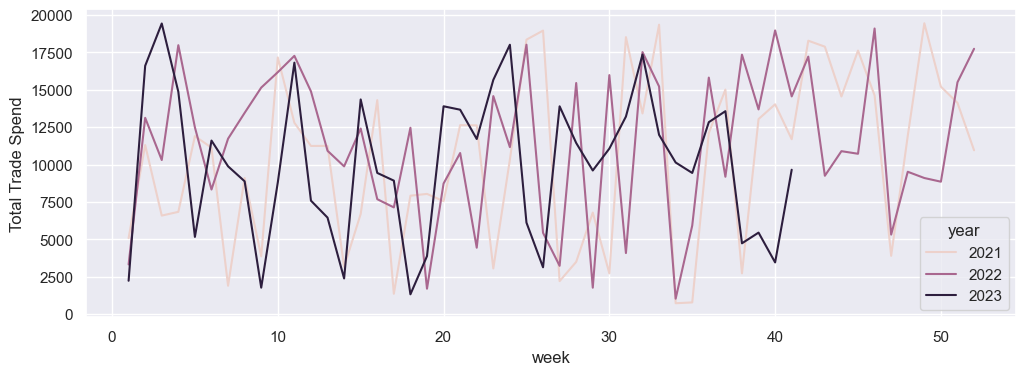

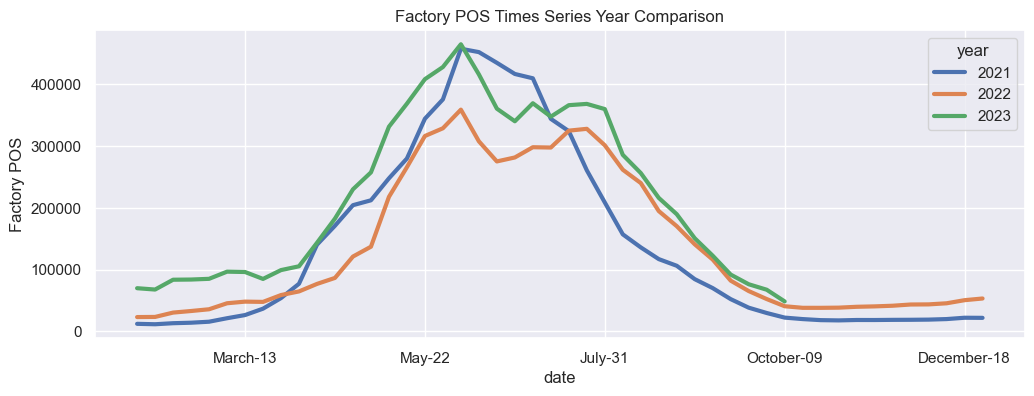

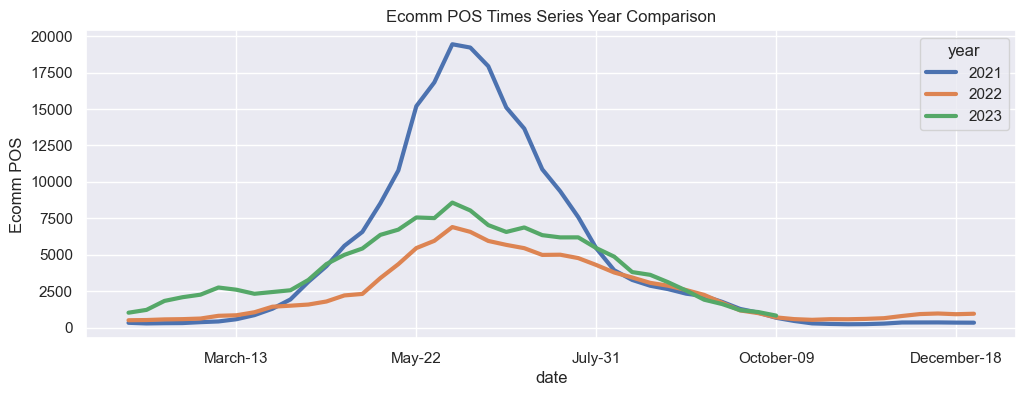

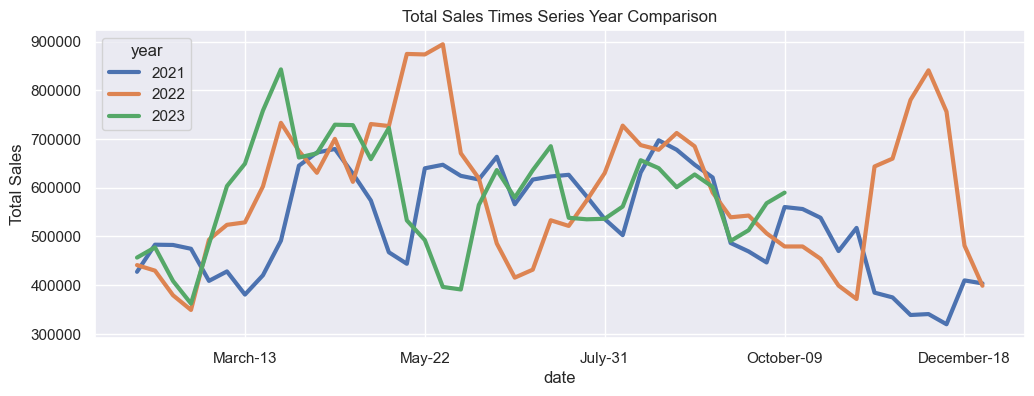

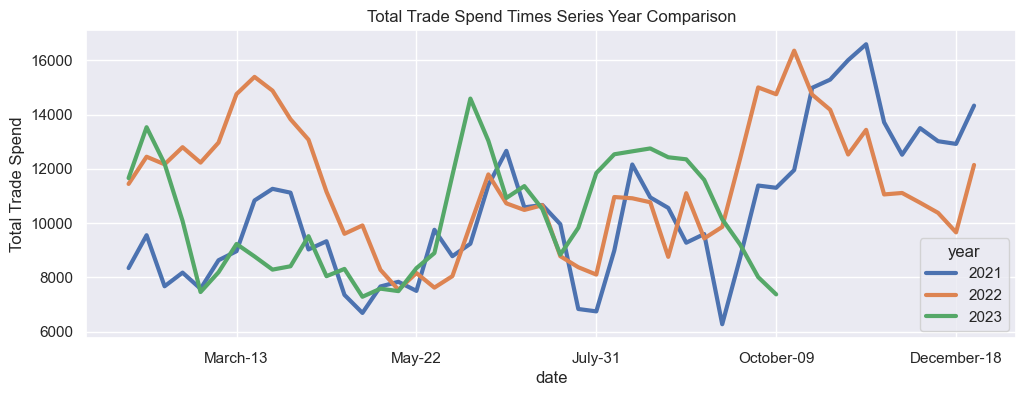

In [185]:
df5 = dfd[(dfd['Need States']=='Need State 5')]
sns.lineplot(df5, x="week", y="Total Trade Spend", hue='year', estimator=None)
plotYearLines('Factory POS', rolling=5, df=df5)
plotYearLines('Ecomm POS', rolling=5, df=df5)
plotYearLines('Total Sales', rolling=5, df=df5)
plotYearLines('Total Trade Spend', rolling=5, df=df5)

year              2021      2022      2023
January-03     6929.25   7405.50   6918.00
January-10     6226.50   9000.75   6349.50
January-17     7128.75   8354.25   5749.50
January-24     6423.75   8982.75   5434.50
January-31     6801.00   8905.50  12224.25
February-07    6545.25   6419.25   6025.50
February-14    5718.00   6573.00   6106.50
February-21    7878.00   6710.25   5668.50
February-28    6035.25   8185.50   6065.25
March-06       5799.00   6075.75   5964.75
March-13       5229.00   5880.75   5513.25
March-20       5707.50   6043.50   6131.25
March-27       6843.00   6873.00   5236.50
April-03       5844.75   5549.25   5472.75
April-10       8559.75   6033.75   4804.50
April-17       7908.75   5556.75   8177.25
April-24      10527.00   8270.25   7598.25
May-01        11718.00   6912.00   7570.50
May-08        11941.50   7340.25   7011.75
May-15        16122.75   9194.25   8346.00
May-22        14102.25   6375.00   7911.00
May-29        13658.25   9875.25   7395.00
June-05    

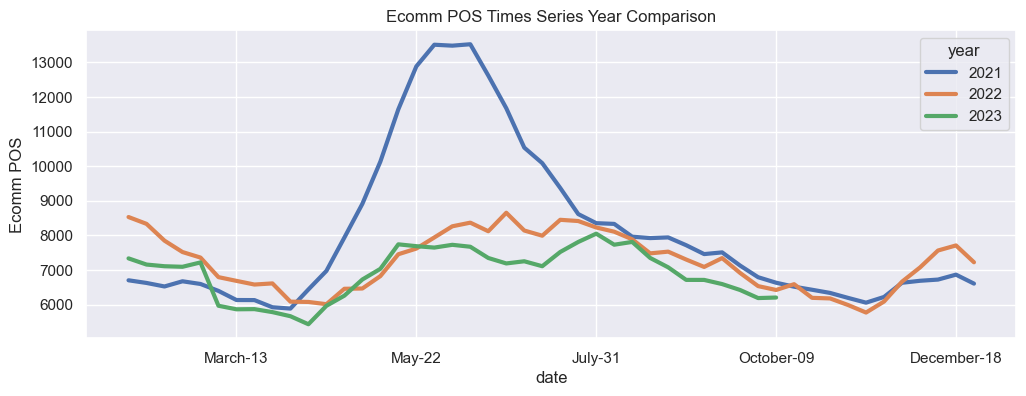

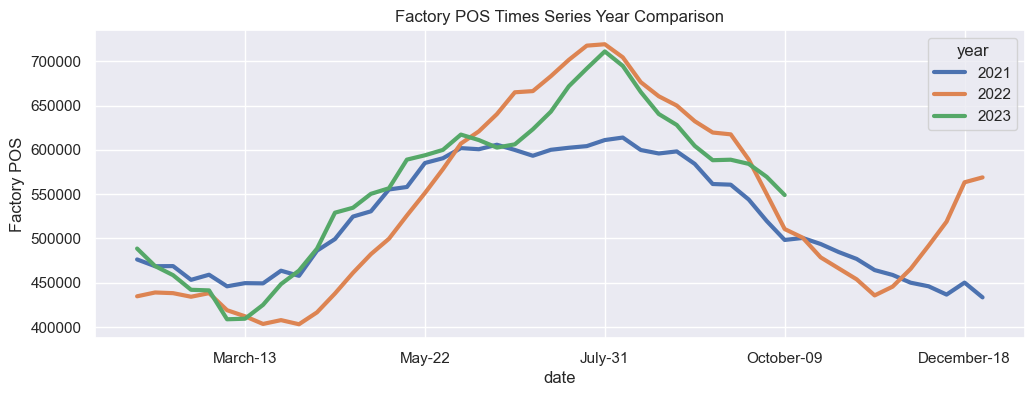

In [187]:
df6 = dfd[(dfd['Need States']=='Need State 6')]
plotYearLines('Ecomm POS', rolling=5, df=df6)
plotYearLines('Factory POS', rolling=5, df=df6)

<Axes: xlabel='DC Amount', ylabel='Ecomm POS'>

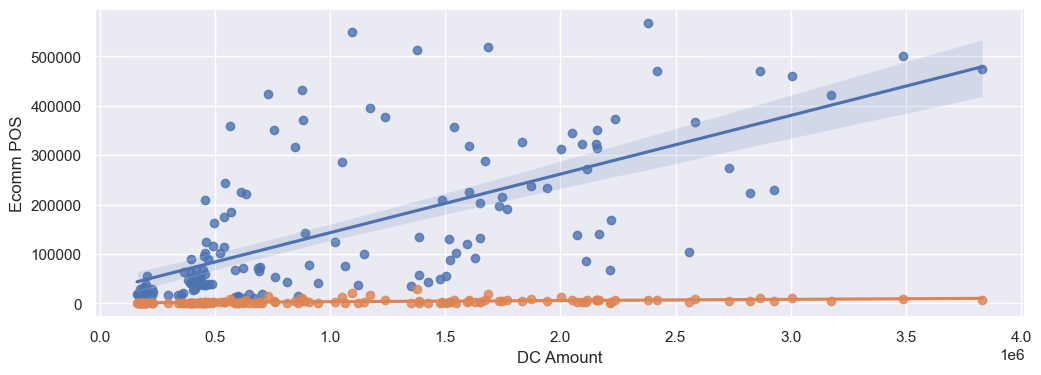

In [208]:
# Linear Regression for NS5 only
sns.regplot(df5, y='Factory POS', x='DC Amount')

<Axes: xlabel='DC Amount', ylabel='Ecomm POS'>

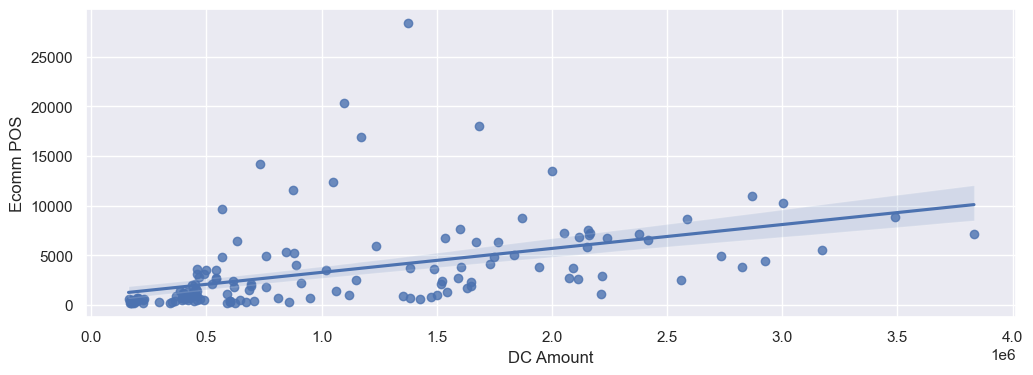

In [210]:
sns.regplot(df5, x='DC Amount', y='Ecomm POS')

<Axes: xlabel='DC Amount', ylabel='Factory POS'>

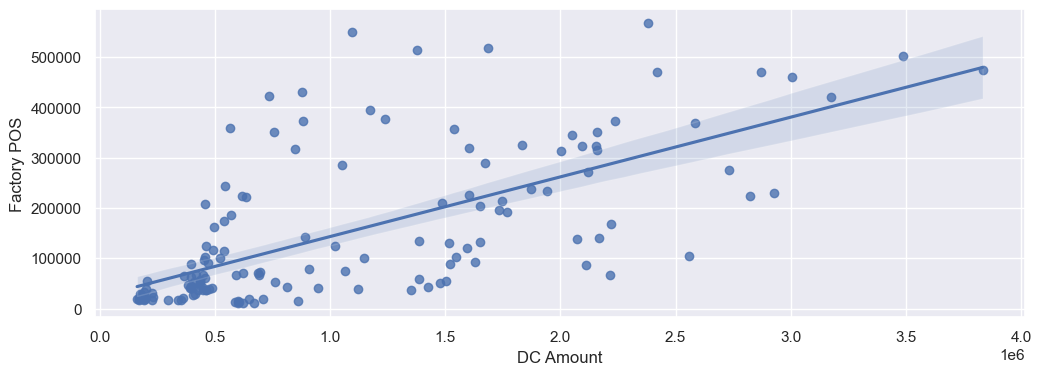

In [209]:
sns.regplot(df5, y='Factory POS', x='DC Amount')

<Axes: xlabel='Total Trade Spend', ylabel='Factory POS'>

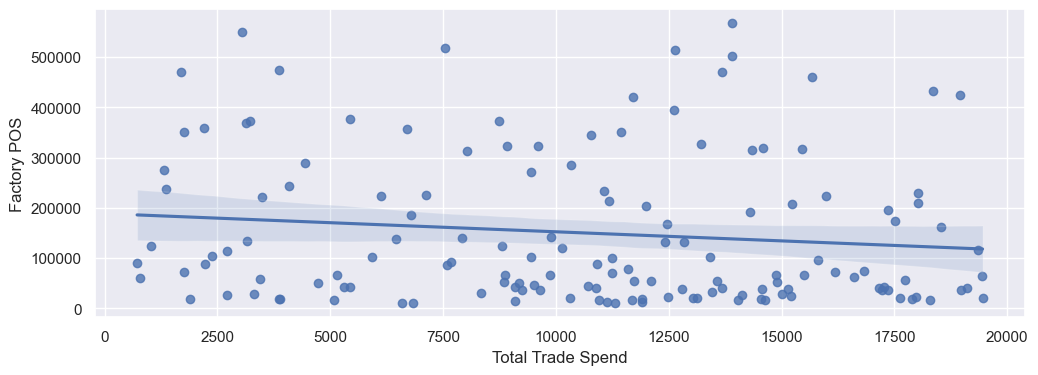

In [204]:
sns.regplot(df5, x='Total Trade Spend', y='Factory POS')

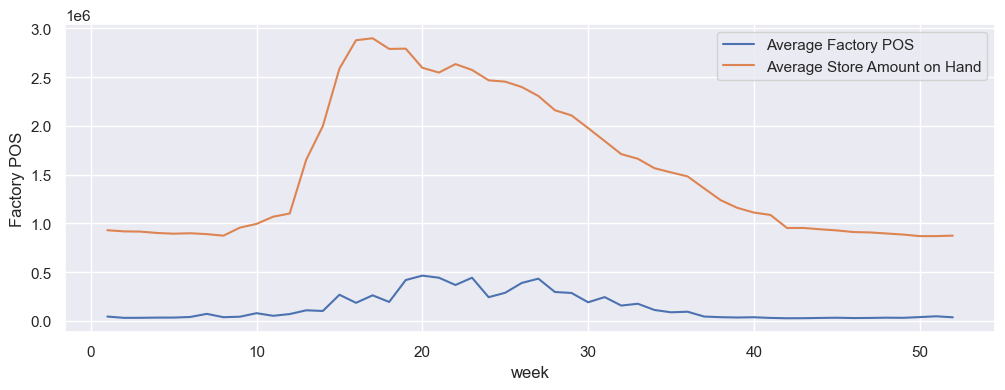

In [264]:
df52021 = df5[(df5['year']==2021)]
df52022 = df5[(df5['year']==2022)]
df52023 = df5[(df5['year']==2023)]
combined_df = pd.concat([df52021, df52022, df52023], keys=['2021', '2022', '2023'], names=['year'])
avgf = combined_df.groupby('week')['Factory POS'].mean().reset_index()
avgdc = combined_df.groupby('week')['Store Amount on Hand'].mean().reset_index()
sns.lineplot(avgf, x='week', y='Factory POS', label='Average Factory POS')
sns.lineplot(avgdc, x='week', y='Store Amount on Hand', label='Average Store Amount on Hand')
plt.show()

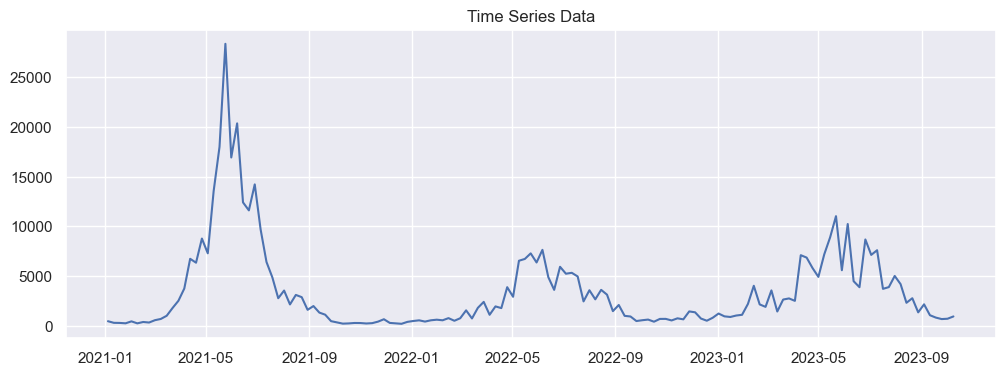

/Users/Anvi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


     day_of_week  month
700            0      3
706            0      4
712            0      4
718            0      4
724            0      4
730            0      5
736            0      5
742            0      5
748            0      5
754            0      5
760            0      6
766            0      6
772            0      6
778            0      6
784            0      7
790            0      7
796            0      7
802            0      7
808            0      7
814            0      8
820            0      8
826            0      8
832            0      8
838            0      9
844            0      9
850            0      9
856            0      9
862            0     10
868            0     10
         Helper Column  year  week       date   Need States  Total Sales  \
4    44200Need State 5  2021     1 2021-01-04  Need State 5    246819.75   
10   44207Need State 5  2021     2 2021-01-11  Need State 5    465099.75   
16   44214Need State 5  2021     3 2021-01-18  Need 

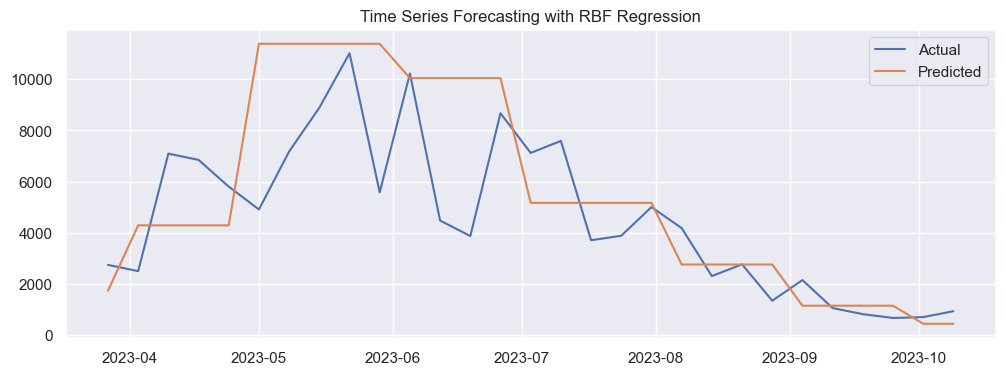

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

df5['date'] = pd.to_datetime(df5['date'])

plt.plot(df5['date'], df5['Ecomm POS'])
plt.title('Time Series Data')
plt.show()

df5['day_of_week'] = df5['date'].dt.dayofweek
df5['month'] = df5['date'].dt.month

train_size = int(len(df5) * 0.8)
train, test = df5[:train_size], df5[train_size:]

X_train = train[['day_of_week', 'month']]  # Include relevant features
y_train = train['Ecomm POS']

kernel = 1.0 * RBF(length_scale=1.0)  # You can adjust the length scale as needed
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
model.fit(X_train, y_train)

#Predictions
X_test = test[['day_of_week', 'month']] 
print(X_test)
print(df5)
predictions, _ = model.predict(X_test, return_std=True)

mse = mean_squared_error(test['Ecomm POS'], predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(test['date'], test['Ecomm POS'], label='Actual')
plt.plot(test['date'], predictions, label='Predicted')
plt.legend()
plt.title('Time Series Forecasting with RBF Regression')
plt.show()

In [285]:
start_date = '2024-01-01'
end_date = '2024-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='W')

X_future = pd.DataFrame(data={'date': date_range})


X_future['day_of_week'] = X_future.date.dt.dayofweek
X_future['month'] = X_future.date.dt.month
X_future



,date,day_of_week,month
0,2024-01-07,6,1
1,2024-01-14,6,1
2,2024-01-21,6,1
3,2024-01-28,6,1
4,2024-02-04,6,2
5,2024-02-11,6,2
6,2024-02-18,6,2
7,2024-02-25,6,2
8,2024-03-03,6,3
9,2024-03-10,6,3


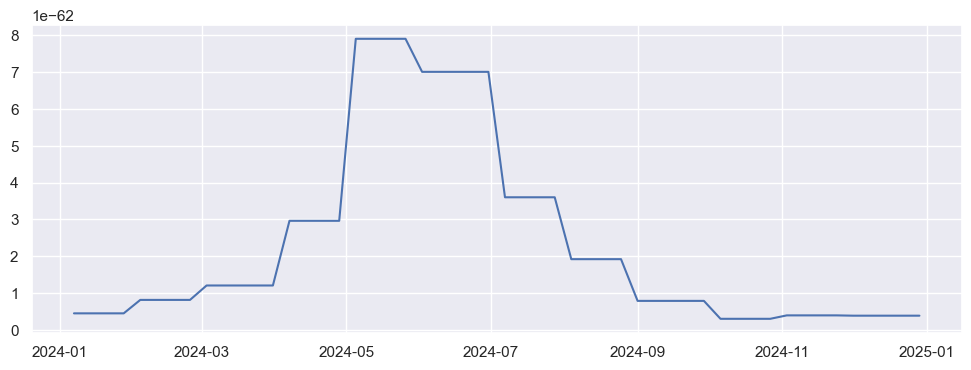

In [286]:
future_predictions = model.predict(X_future[['day_of_week', 'month']])

plt.plot(X_future['date'], future_predictions)